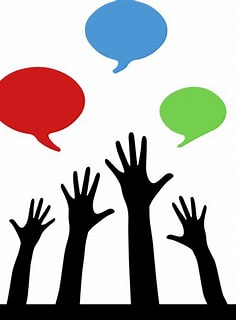

## GRIP Jan'23 Task - Prediction using Supervised ML - Linear Regression Model
## Data Science and Business Analytics Domain 
## Prediction of percentage of a student no. of hours
## Mythili Subramanian

###### Task: 
Predict the percentage of a student based upon the number of study hours he/she puts in using Supervised Machine Learning i.e Simple Linear Regression Model. Also we would be predicting the student score if he/she studies for 9.5 hours a day.

We would be using Python and its libraries Pandas, Numpy, #Machine Learning libraries - Scikit Learn # visualization libraries- Matplotlib and Seaborn

#### Importing the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### url contains the dataset link which is been read for loading into a DataFrame

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
try:
    student = pd.read_csv(url)
    print('DataFrame created successfully')
except:
    print('DataFrame not created')

DataFrame created successfully


In [3]:
student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Checking the size of the dataset

In [4]:
student.shape

(25, 2)

DataFrame has 25 rows and 2 columns

#### Displaying top 5 rows

In [ ]:
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Displaying last 5 rows

In [ ]:
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Deriving the statistical summary of DataFrame

In [ ]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### OBSERVATIONS : 

Student's average scores are 51.48 percent when he/she puts in 5.012 hours of study. And maximum scores are 95 percent with 9.2 hours of study

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the dataset

### Univariate Analysis

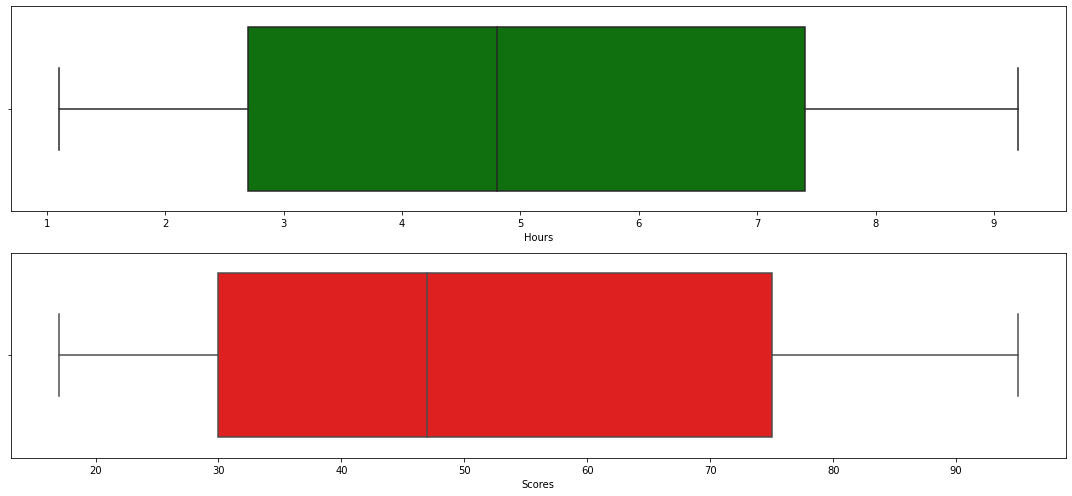

In [ ]:
fig, axis = plt.subplots(nrows = 2 , ncols = 1 , figsize = (15 , 7))
sns.boxplot(data = student , x = student["Hours"] , ax = axis[0],color = "g")  
sns.boxplot(data = student , x = student["Scores"] , ax = axis[1],color = "r")  
plt.tight_layout()
plt.show()

##### OBSERVATIONS : 

1) There are no outliers in either of the attributes of the dataset.

2) "Hours" attribute ranges from 1.7 to 9.2 

3) "Scores" attribute ranges from 17% to 95%

### Bivariate Analysis

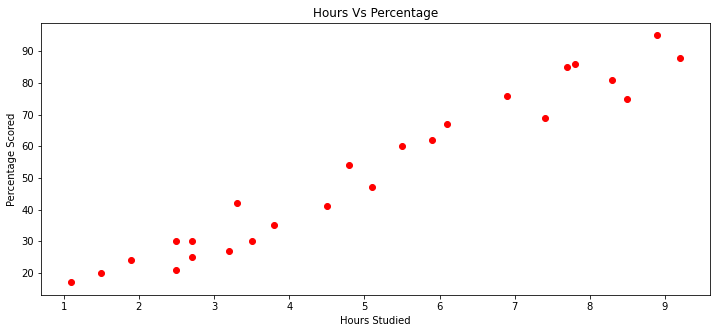

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(student.Hours, student.Scores, color='Red')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()


###### OBSERVATIONS : 

There is a linear relationship between Hours Studied and Percentage scored

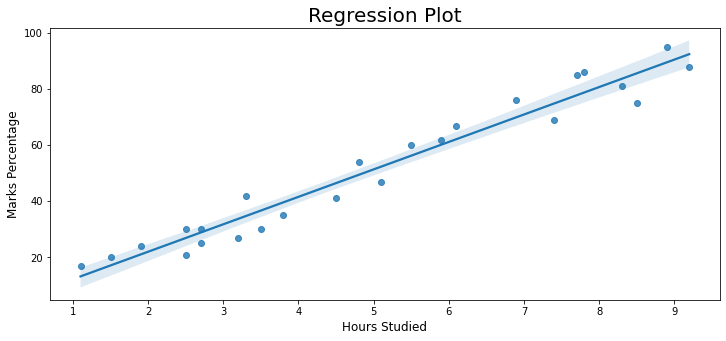

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [32]:
plt.figure(figsize=(12,5))
sns.regplot(student.Hours, student.Scores)
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(student.corr())

###### OBSERVATIONS: 

The variables are positively correlated

### Next lets initialize the X (independent variables / "Hours") and y (dependent variable / "Scores") from student dataframe

In [17]:
X=student.drop("Scores", axis = 1)
y=student["Scores"]

#### Splitting X and y into X_train, X_test, y_train, y_test. 20% of the data is used for testing.

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

#### Creating an object of Linear Regression Model and training it

In [20]:
linear = LinearRegression()

try:
    linear.fit(X_train, y_train)
    print("Model has been trained successfully")
except:
    print("There is a problem with the model")

Model has been trained successfully


#### Regression Line to be produced with the trained Linear Regression model and plotting it

In [21]:
# equation
# y = mx + c
# y = dependant variable
# m = slope
# x = independent variable
# c = line of intercept

reg_line = linear.coef_ * X_train + linear.intercept_ 
print('Regression_Line')
print(reg_line)

print('Slope:', linear.coef_)

print('Line of Intercept:', linear.intercept_)


Regression_Line
        Hours
9   28.968503
13  34.777750
1   52.205491
22  39.618789
5   17.350010
2   33.809542
12  46.396244
15  88.997388
3   85.124557
4   36.714166
20  28.968503
17  21.222841
21  49.300867
18  61.887569
24  78.347102
7   56.078322
10  77.378894
14  13.477178
19  74.474271
6   91.902011
Slope: [9.68207815]
Line of Intercept: 2.826892353899737


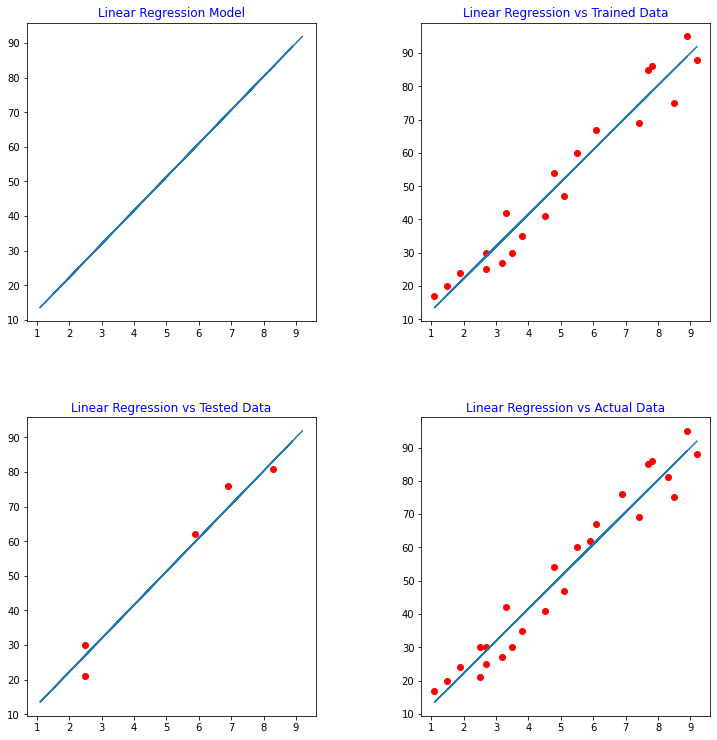

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12)) # 2 rows and 2 columns subplots
fig.tight_layout(pad = 7.5) # padding between each subplots


ax[0, 0].set_title('Linear Regression Model', color='Blue')
ax[0, 0].plot(X_train, reg_line)


ax[0, 1].set_title('Linear Regression vs Trained Data', color='Blue')
ax[0, 1].scatter(X_train, y_train, color='Red')            
ax[0, 1].plot(X_train, reg_line)



ax[1, 0].set_title('Linear Regression vs Tested Data', color='Blue')
ax[1, 0].scatter(X_test, y_test, color='Red')            
ax[1, 0].plot(X_train, reg_line)



ax[1, 1].set_title('Linear Regression vs Actual Data', color='Blue')
ax[1, 1].scatter(X, y, color='Red')            
ax[1, 1].plot(X_train, reg_line)


plt.show()

#### Predicting the percentage_scores for X_test

In [25]:
predict = linear.predict(X_test)

In [26]:
predict

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

#### Comparing Actual vs Predicted Data

In [27]:
predicted_data = pd.DataFrame({'Test_Hours': X_test['Hours'], 'Actual_Scores': y_test, 'Predicted_scores': predict})  
predicted_data

,Test_Hours,Actual_Scores,Predicted_scores
8,8.3,81,83.188141
16,2.5,30,27.032088
0,2.5,21,27.032088
23,6.9,76,69.633232
11,5.9,62,59.951153


### Plotting the graph for comparison of Actual vs Predicted Data

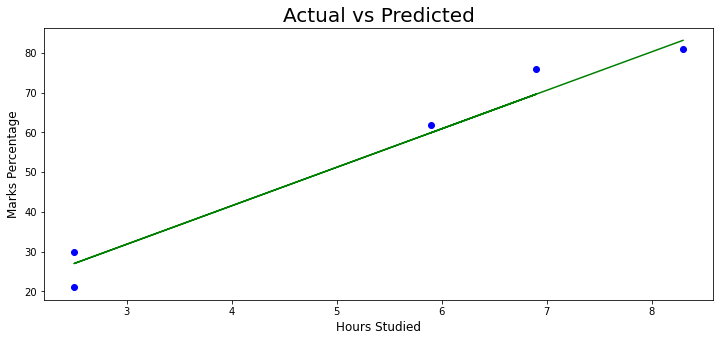

In [33]:
plt.figure(figsize=(12,5))
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test,predict, color='Green')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating Model Performance

In [31]:
#r2_score is the co-efficient of determination(regression score function). It is the co-efficient of how well the values fit compared to the original values
#Its value ranges between 0 to 1, 1 being the best value. Sometimes negative r1_score is also returned.
print('r2_score:' , r2_score(y_test, predict))

#Mean Squared Error : Mean Squared Error calculates the average of the sum of the squared differences between a data point and the line of best fit. 
#By virtue of this, the lower a mean squared error, the more better the line represents the relationship.
print('Mean Squared Error:', mean_squared_error(y_test, predict))


#Mean Absolute Error : Mean Absolute Error calculates the average difference between the calculated values and actual values.
print('Mean Absolute Error:', mean_absolute_error(y_test, predict))

 
#Root Mean Squared Error : Square root of MSE
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predict)))


r2_score: 0.9678055545167994
Mean Squared Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288


###### Observations: 

1) r2_score value being 0.967 implies the test values have fit very well compared to original values.

2) Lower Mean Squared Error means between actual and predicted relationship is more better

3) Lower Mean Absolute Error means that the chances of error or wrong forecasting through the model are very less.

### Predicting the score if a student studies for 9.25 hrs/ day?

In [ ]:
hours = pd.DataFrame({'Hours': [9.25]})
predict_score = linear.predict(hours)

print(f"No of Hours = {hours['Hours'][0]}")
print(" ")
print(f"Predicted Score = {predict_score[0]}")

No of Hours = 9.25
 
Predicted Score = 92.38611528261494


Answer: So the predicted score would be '93.893' of a student if he/she studies for 9.25 hours per day.